In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [17]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Data Analysis\New folder\Website_Data_Analysis\Website data.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [18]:
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [20]:
data.columns = data.iloc[0]
data = data.drop(index=0).reset_index(drop=True)
data.columns = ["Channel_Group","DateHour","Users","Sessions","Engaged Sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event Count"]

In [21]:
data.head()

,Channel_Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel_Group                        3181 non-null   object
 1   DateHour                             3181 non-null   object
 2   Users                                3181 non-null   object
 3   Sessions                             3181 non-null   object
 4   Engaged Sessions                     3181 non-null   object
 5   Average engagement time per session  3181 non-null   object
 6   Engaged sessions per user            3181 non-null   object
 7   Events per session                   3181 non-null   object
 8   Engagement rate                      3181 non-null   object
 9   Event Count                          3181 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


In [24]:
data['DateHour'] = pd.to_datetime(data['DateHour'],format="%Y%m%d%H",errors='coerce')

data['DateHour'].dtypes

dtype('<M8[ns]')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel_Group                        3181 non-null   object        
 1   DateHour                             3181 non-null   datetime64[ns]
 2   Users                                3181 non-null   object        
 3   Sessions                             3181 non-null   object        
 4   Engaged Sessions                     3181 non-null   object        
 5   Average engagement time per session  3181 non-null   object        
 6   Engaged sessions per user            3181 non-null   object        
 7   Events per session                   3181 non-null   object        
 8   Engagement rate                      3181 non-null   object        
 9   Event Count                          3181 non-null   object        
dtypes: datetime6

In [26]:
data.head(2)

,Channel_Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069


In [29]:
numeric_cols = data.columns.drop(['Channel_Group','DateHour'])
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric,errors='coerce')
data['Hour'] = data['DateHour'].dt.hour

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel_Group                        3181 non-null   object        
 1   DateHour                             3181 non-null   datetime64[ns]
 2   Users                                3181 non-null   int64         
 3   Sessions                             3181 non-null   int64         
 4   Engaged Sessions                     3181 non-null   int64         
 5   Average engagement time per session  3181 non-null   float64       
 6   Engaged sessions per user            3181 non-null   float64       
 7   Events per session                   3181 non-null   float64       
 8   Engagement rate                      3181 non-null   float64       
 9   Event Count                          3181 non-null   int64         
 10  Hour        

In [31]:
data.head(2)

,Channel_Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23


In [32]:
data.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour
count,3181,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,2024-04-20 01:18:31.348632576,41.874568,51.114429,28.289217,66.650591,0.606449,4.675970,0.503404,241.907891,11.803521
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.040404,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.500000,0.750000,5.218182,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,208.000000,267.000000,132.000000,4525.000000,2.000000,56.000000,1.000000,1147.000000,23.000000
std,NaN,29.383942,36.661139,20.551668,127.220206,0.264064,2.795667,0.228241,183.318978,6.884907


In [33]:
data.isnull().sum()

Channel_Group                          0
DateHour                               0
Users                                  0
Sessions                               0
Engaged Sessions                       0
Average engagement time per session    0
Engaged sessions per user              0
Events per session                     0
Engagement rate                        0
Event Count                            0
Hour                                   0
dtype: int64

In [34]:
data.duplicated().sum()

np.int64(0)

Sessions and user over time 

In [35]:
sns.set(style='whitegrid')

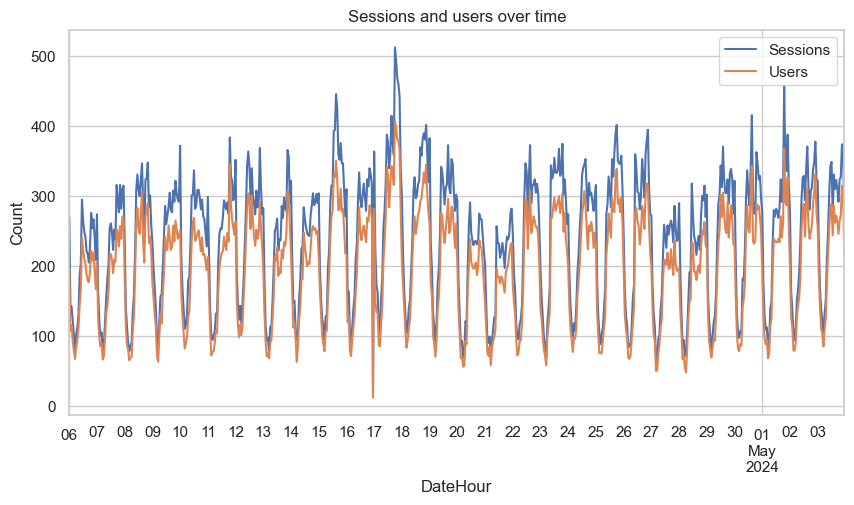

In [37]:
plt.figure(figsize=(10,5))
data.groupby("DateHour")[['Sessions','Users']].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

Total users by Channel

C:\Users\HP\AppData\Local\Temp\ipykernel_25524\1166838580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data,x='Channel_Group',y='Users',estimator=np.sum,palette='viridis',errorbar=None)


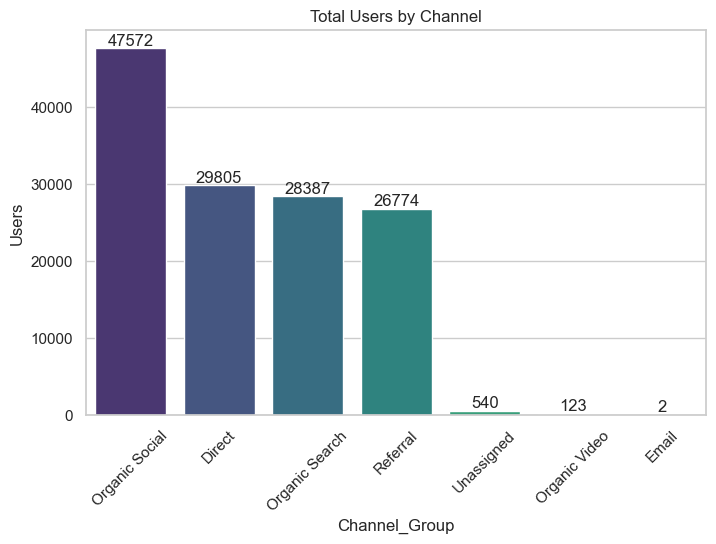

In [75]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=data,x='Channel_Group',y='Users',estimator=np.sum,palette='viridis',errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

In [42]:
data.head(2)

,Channel_Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23


C:\Users\HP\AppData\Local\Temp\ipykernel_25524\2647364842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(


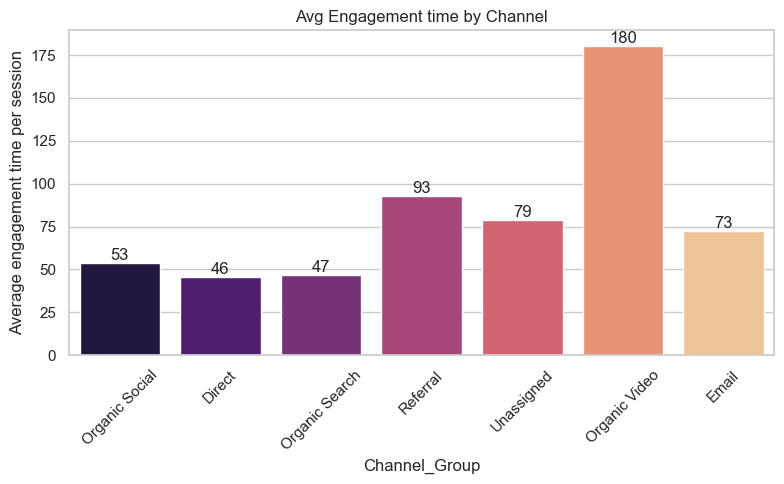

In [55]:
plt.figure(figsize=(8,5))
ax=sns.barplot(
    data=data,
    x='Channel_Group',
    y='Average engagement time per session',
    palette=sns.color_palette('magma',n_colors=data['Channel_Group'].nunique()),
    legend=False,
    errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.0f')
plt.title("Avg Engagement time by Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Engagement Rate Distribution by Channel

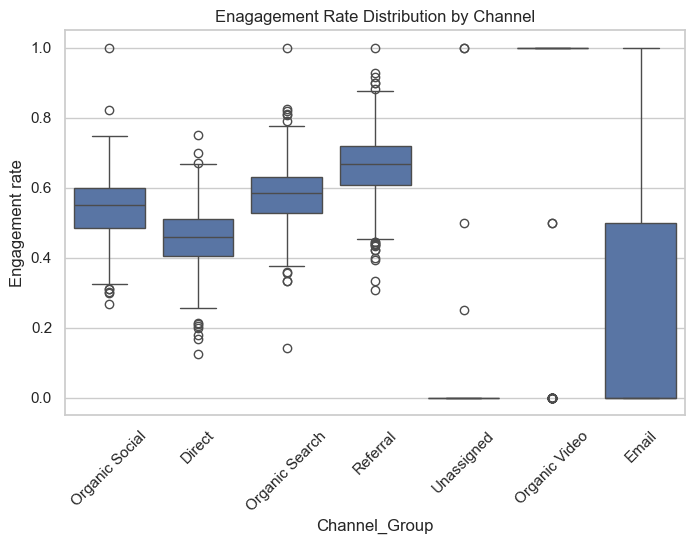

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data,x='Channel_Group',y='Engagement rate')
plt.title("Enagagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

Engaged vs non-engaged sessions

In [58]:
data.head(2)

,Channel_Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23


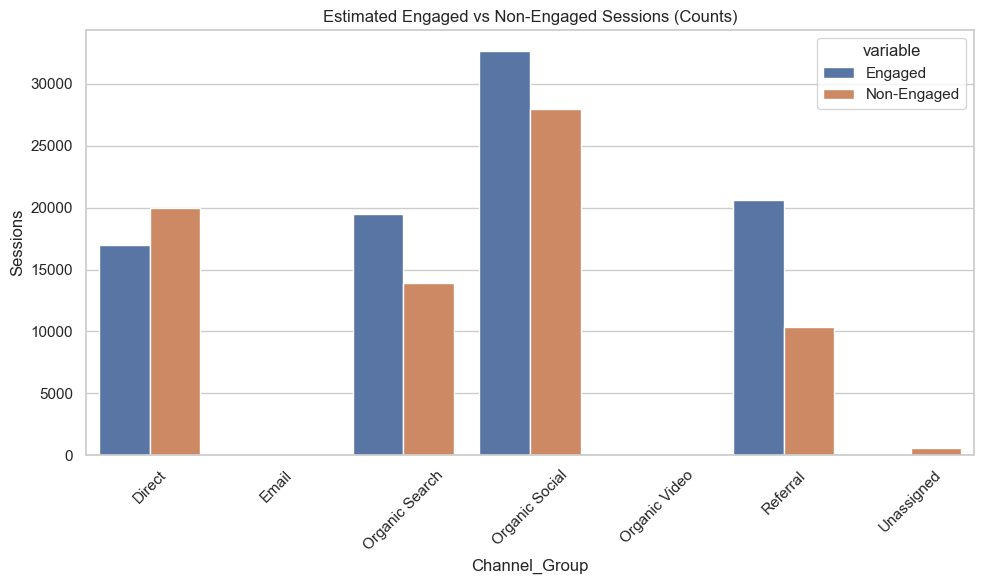

In [ ]:

# Get total sessions and users
sessions_sum = data.groupby('Channel_Group')[['Sessions']].sum()
users_sum = data.groupby('Channel_Group')[['Users']].sum()
engaged_avg = data.groupby('Channel_Group')[['Engaged sessions per user']].mean()

# Combine into one DataFrame
session_df = sessions_sum.join(users_sum).join(engaged_avg)

# Calculate estimated engaged sessions
session_df['Engaged'] = session_df['Engaged sessions per user'] * session_df['Users']

# Calculate non-engaged sessions
session_df['Non-Engaged'] = session_df['Sessions'] - session_df['Engaged']

# Clean for plotting
session_df = session_df[['Engaged', 'Non-Engaged']].reset_index()
session_df_melted = session_df.melt(id_vars='Channel_Group', value_vars=['Engaged', 'Non-Engaged'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=session_df_melted, x='Channel_Group', y='value', hue='variable')
plt.title("Estimated Engaged vs Non-Engaged Sessions (Counts)")
plt.ylabel("Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Traffic by hour and channel

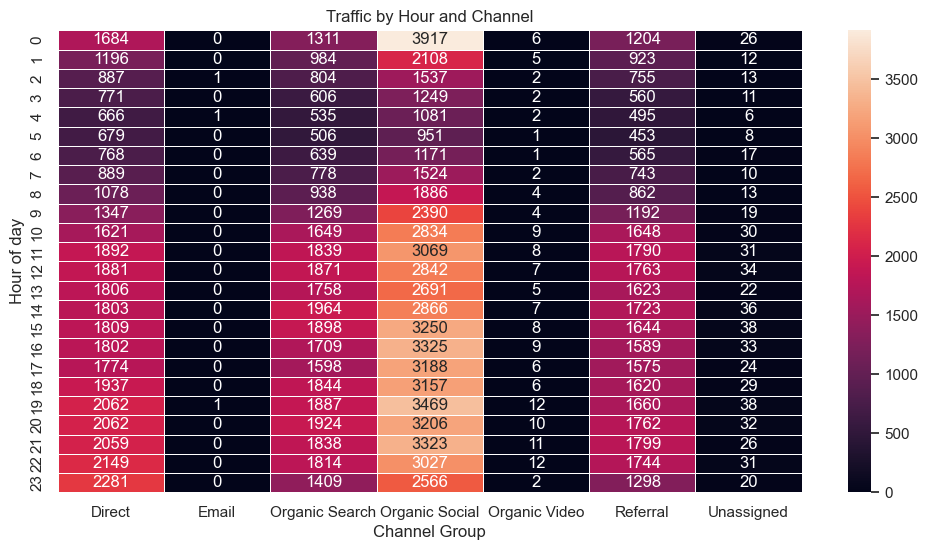

In [70]:
heatmap_data=data.groupby(['Hour','Channel_Group'])['Sessions'].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,linewidths=.5,annot=True,fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel('Channel Group')
plt.ylabel('Hour of day')
plt.show()

In [71]:
data.head()

,Channel_Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


Engagement Rate vs Sessions over time

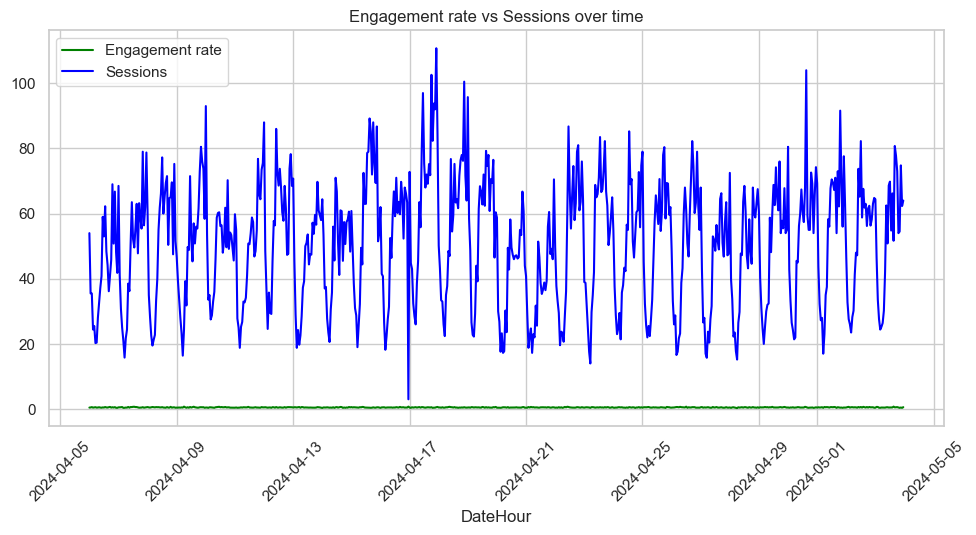

In [74]:
df_plot = data.groupby('DateHour')[['Engagement rate','Sessions']].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot['DateHour'],df_plot['Engagement rate'],label='Engagement rate',color='green')
plt.plot(df_plot['DateHour'],df_plot['Sessions'],label='Sessions',color='blue')
plt.title("Engagement rate vs Sessions over time")
plt.xlabel('DateHour')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()